In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## There are 7 steps in Data Science lifecycle
1. Business Understanding
2. Data mining
3. Data cleaning
4. Data Exploration
5. Feather Engineering
6. Predictive Modeling
7. Data visualization


# 1.Business Understanding

This dataset contains data of petrol consumption, prices, share percentage of countries. Visualize the data and predict price of petrol.

# 2.Data mining

In [ ]:
#reading data from .csv file as a dataset
df=pd.read_csv('/content/drive/MyDrive/Machine_Learning/Petrol Dataset June 20 2022.csv',encoding='latin-1')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#show first 5 rows of the dataset
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
1,United States,19687287,20.30%,934.300000,5.190000,1.370000,289.970000
2,China,12791553,13.20%,138.700000,5.420000,1.430000,302.870000
3,India,4443000,4.60%,51.400000,5.050000,1.330000,281.930000
4,Japan,4012877,4.10%,481.500000,4.690000,1.240000,262.050000
5,Russia,3631287,3.70%,383.200000,3.410000,0.900000,190.560000


Check the number of rows and columns, data type of each column values.

In [ ]:
#print the information of dataset, number of non-null cell, data type of each column values,number of rows and columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   #                                181 non-null    int64  
 1   Country                          181 non-null    object 
 2   Daily Oil Consumption (Barrels)  181 non-null    int64  
 3   World Share                      181 non-null    object 
 4   Yearly Gallons Per Capita        181 non-null    float64
 5   Price Per Gallon (USD)           181 non-null    float64
 6   Price Per Liter (USD)            181 non-null    float64
 7   Price Per Liter (PKR)            181 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 11.4+ KB


In [ ]:
#print number of rows and columns of the dataset
df.shape

(181, 8)

In [ ]:
#print the list of column header names.
df.columns

Index(['#', 'Country', 'Daily Oil Consumption (Barrels)', 'World Share',
       'Yearly Gallons Per Capita', 'Price Per Gallon (USD)',
       'Price Per Liter (USD)', 'Price Per Liter (PKR)'],
      dtype='object')

# 3.Data cleaning

In [ ]:
#Print first 5 rows of the dataset
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()


#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
1,United States,19687287,20.30%,934.300000,5.190000,1.370000,289.970000
2,China,12791553,13.20%,138.700000,5.420000,1.430000,302.870000
3,India,4443000,4.60%,51.400000,5.050000,1.330000,281.930000
4,Japan,4012877,4.10%,481.500000,4.690000,1.240000,262.050000
5,Russia,3631287,3.70%,383.200000,3.410000,0.900000,190.560000


In [ ]:
#Print list of columns
df.columns

Index(['#', 'Country', 'Daily Oil Consumption (Barrels)', 'World Share',
       'Yearly Gallons Per Capita', 'Price Per Gallon (USD)',
       'Price Per Liter (USD)', 'Price Per Liter (PKR)'],
      dtype='object')

We can drop first column, it only contains serial numbers. It will not have significant effect on modeling or visualization.

In [ ]:
#drop column # 
df.drop('#',inplace =True , axis=1)

In [ ]:
#Print the updated dataset after droping the column #
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()



Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
United States,19687287,20.30%,934.300000,5.190000,1.370000,289.970000
China,12791553,13.20%,138.700000,5.420000,1.430000,302.870000
India,4443000,4.60%,51.400000,5.050000,1.330000,281.930000
Japan,4012877,4.10%,481.500000,4.690000,1.240000,262.050000
Russia,3631287,3.70%,383.200000,3.410000,0.900000,190.560000


Rename column **World Share** to **World Share %**

In [ ]:
#rename the title World Share to World Share %. datatype of this column is str , so we need to change it to float, and remove the % symbol. The % symbol in title will give the information the this column contains percentages.
df.rename(columns={'World Share': 'World Share %'},inplace=True)

In [ ]:
#Print updated dataset after renaming attribute World Share to World Share %
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Country,Daily Oil Consumption (Barrels),World Share %,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
United States,19687287,20.30%,934.300000,5.190000,1.370000,289.970000
China,12791553,13.20%,138.700000,5.420000,1.430000,302.870000
India,4443000,4.60%,51.400000,5.050000,1.330000,281.930000
Japan,4012877,4.10%,481.500000,4.690000,1.240000,262.050000
Russia,3631287,3.70%,383.200000,3.410000,0.900000,190.560000


Convert the data type of **World share** column to **float64**

Step 1: Remove the symbol of % from each value

In [ ]:
# Strip % form each value as we need convert it to float from str data type
df['World Share %']=df['World Share %'].str.rstrip('%')

Step 2: Convert data type from str to float

In [ ]:
#Covert data type from str to float
df['World Share %']=df['World Share %'].astype(float)

Check the total of all percentages

In [ ]:
#Summation of all values in coulmn World Share %
df['World Share %'].sum()

99.60999999999999

The summation of all values is not eqauls to zero, because rounding of has changed very small values to zero.

The **World share %** is not exactly accurate therefore we recalculate the World share percentage


In [ ]:
#The World share % is not accurate therefore we recalculate the World share.
#Each value from 'Daily Oil Consumption (Barrels)' divided by summation of Daily Oil Consumption (Barrels) multiply by 100.
Total_Consumption=df['Daily Oil Consumption (Barrels)'].sum()
df['World Share %']=(df['Daily Oil Consumption (Barrels)']/Total_Consumption)*100

In [ ]:
# Print updated dataset with correct accuarate percentages in World Share 5 column
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Country,Daily Oil Consumption (Barrels),World Share %,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
United States,19687287,20.385127,934.300000,5.190000,1.370000,289.970000
China,12791553,13.244965,138.700000,5.420000,1.430000,302.870000
India,4443000,4.600487,51.400000,5.050000,1.330000,281.930000
Japan,4012877,4.155118,481.500000,4.690000,1.240000,262.050000
Russia,3631287,3.760002,383.200000,3.410000,0.900000,190.560000


Check for any null cells

In [ ]:
#print count of all null cells from each column
df.isnull().sum()

Country                            0
Daily Oil Consumption (Barrels)    0
World Share %                      0
Yearly Gallons Per Capita          0
Price Per Gallon (USD)             0
Price Per Liter (USD)              0
Price Per Liter (PKR)              0
dtype: int64

# 4.Data Exploration

Statistical details of the dataset

In [ ]:
#print describtion of the dataset which gives us statisitcal overview of the dataset.
df.describe(include='all').style.background_gradient(cmap='coolwarm').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Country,Daily Oil Consumption (Barrels),World Share %,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
181,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
181,nan,nan,nan,nan,nan,nan
United States,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan,nan
nan,533573.049724,0.552486,332.006630,5.695691,1.505138,318.219227
nan,1858067.102260,1.923929,436.558735,4.370484,1.154575,244.192081
nan,51.000000,0.000053,2.200000,0.080000,0.020000,4.650000
nan,20036.000000,0.020746,53.900000,4.150000,1.100000,232.020000
nan,61612.000000,0.063796,180.200000,5.280000,1.400000,295.040000
nan,262352.000000,0.271651,424.600000,6.760000,1.790000,377.740000


**Total number of countries in the dataset is 181.**

**Highest price of petrol is 14.5 USD / 3066.75 PKR.**

**Lowest price of petrol is 0.02 USD / 4.65 PKR.**

**Average price of petrol is 1.51 USD / 318.22 PKR.**

In [ ]:
df.columns

Index(['Country', 'Daily Oil Consumption (Barrels)', 'World Share %',
       'Yearly Gallons Per Capita', 'Price Per Gallon (USD)',
       'Price Per Liter (USD)', 'Price Per Liter (PKR)'],
      dtype='object')

In [ ]:
print('Country with lowest Daily Oil Consumption (Barrels):',df['Daily Oil Consumption (Barrels)'].min())
print(df[df['Daily Oil Consumption (Barrels)']==df['Daily Oil Consumption (Barrels)'].min()]['Country'])

print('\n\nCountry with lowest World Share % :',df['World Share %'].min())
print(df[df['World Share %']==df['World Share %'].min()]['Country'])

print('\n\nCountry with lowest Yearly Gallons Per Capita :',df['Yearly Gallons Per Capita'].min())
print(df[df['Yearly Gallons Per Capita']==df['Yearly Gallons Per Capita'].min()]['Country'])

print('\n\nCountry with lowest Price Per Gallon (USD) :',df['Price Per Gallon (USD)'].min())
print(df[df['Price Per Gallon (USD)']==df['Price Per Gallon (USD)'].min()]['Country'])

print('\n\nCountry with lowest Price Per Liter (USD) :',df['Price Per Liter (USD)'].min())
print(df[df['Price Per Liter (USD)']==df['Price Per Liter (USD)'].min()]['Country'])

Country with lowest Daily Oil Consumption (Barrels): 51
180    Niue
Name: Country, dtype: object


Country with lowest World Share % : 5.280775630384307e-05
180    Niue
Name: Country, dtype: object


Country with lowest Yearly Gallons Per Capita : 2.2
170    Burundi
Name: Country, dtype: object


Country with lowest Price Per Gallon (USD) : 0.08
32    Venezuela
Name: Country, dtype: object


Country with lowest Price Per Liter (USD) : 0.02
32    Venezuela
Name: Country, dtype: object


In [ ]:
print('Country with highest Daily Oil Consumption (Barrels):',df['Daily Oil Consumption (Barrels)'].max())
print(df[df['Daily Oil Consumption (Barrels)']==df['Daily Oil Consumption (Barrels)'].max()]['Country'])

print('\n\nCountry with highest World Share % :',df['World Share %'].max())
print(df[df['World Share %']==df['World Share %'].max()]['Country'])

print('\n\nCountry with highest Yearly Gallons Per Capita :',df['Yearly Gallons Per Capita'].max())
print(df[df['Yearly Gallons Per Capita']==df['Yearly Gallons Per Capita'].max()]['Country'])

print('\n\nCountry with highest Price Per Gallon (USD) :',df['Price Per Gallon (USD)'].max())
print(df[df['Price Per Gallon (USD)']==df['Price Per Gallon (USD)'].max()]['Country'])

print('\n\nCountry with highest Price Per Liter (USD) :',df['Price Per Liter (USD)'].max())
print(df[df['Price Per Liter (USD)']==df['Price Per Liter (USD)'].max()]['Country'])

Country with highest Daily Oil Consumption (Barrels): 19687287
0    United States
Name: Country, dtype: object


Country with highest World Share % : 20.385126552545447
0    United States
Name: Country, dtype: object


Country with highest Yearly Gallons Per Capita : 3679.5
15    Singapore
Name: Country, dtype: object


Country with highest Price Per Gallon (USD) : 54.89
139    North Korea
Name: Country, dtype: object


Country with highest Price Per Liter (USD) : 14.5
139    North Korea
Name: Country, dtype: object


# 5.Feather Engineering

Check the correlation between columns

In [ ]:
df.corr().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Daily Oil Consumption (Barrels),World Share %,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
1.000000,1.000000,0.149248,-0.029965,-0.030106,-0.029938
1.000000,1.000000,0.149248,-0.029965,-0.030106,-0.029938
0.149248,0.149248,1.000000,0.057293,0.057471,0.057368
-0.029965,-0.029965,0.057293,1.000000,0.999997,1.000000
-0.030106,-0.030106,0.057471,0.999997,1.000000,0.999997
-0.029938,-0.029938,0.057368,1.000000,0.999997,1.000000


Plot heatmap of correlation between columns 

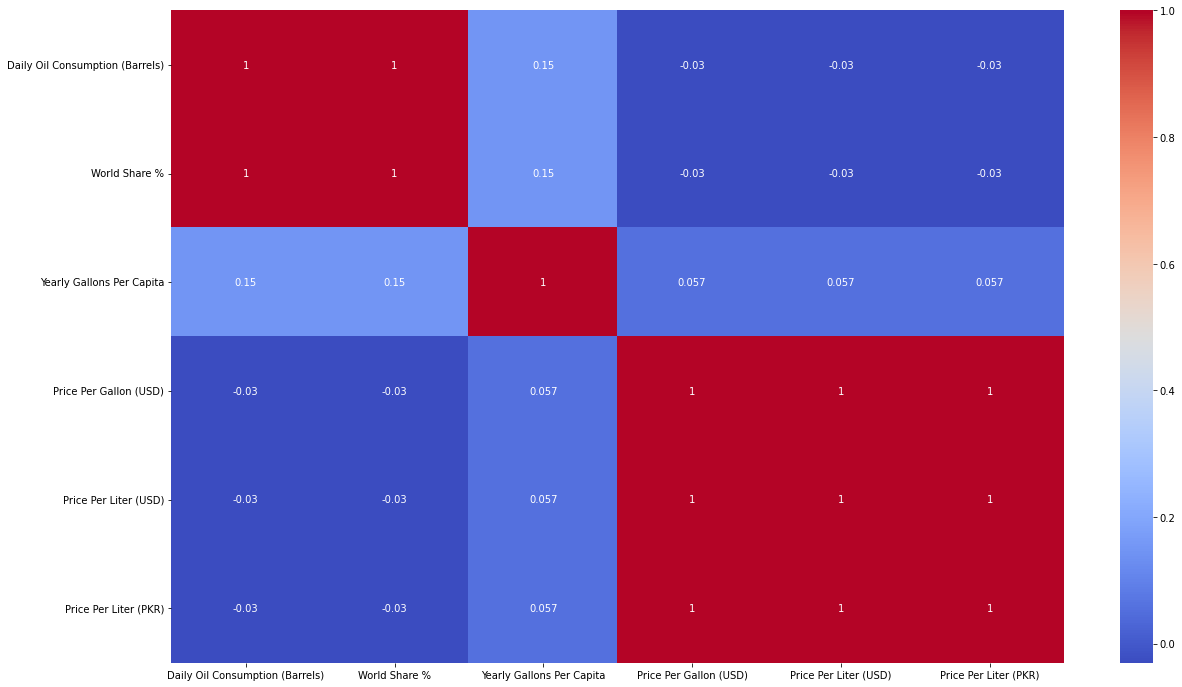

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


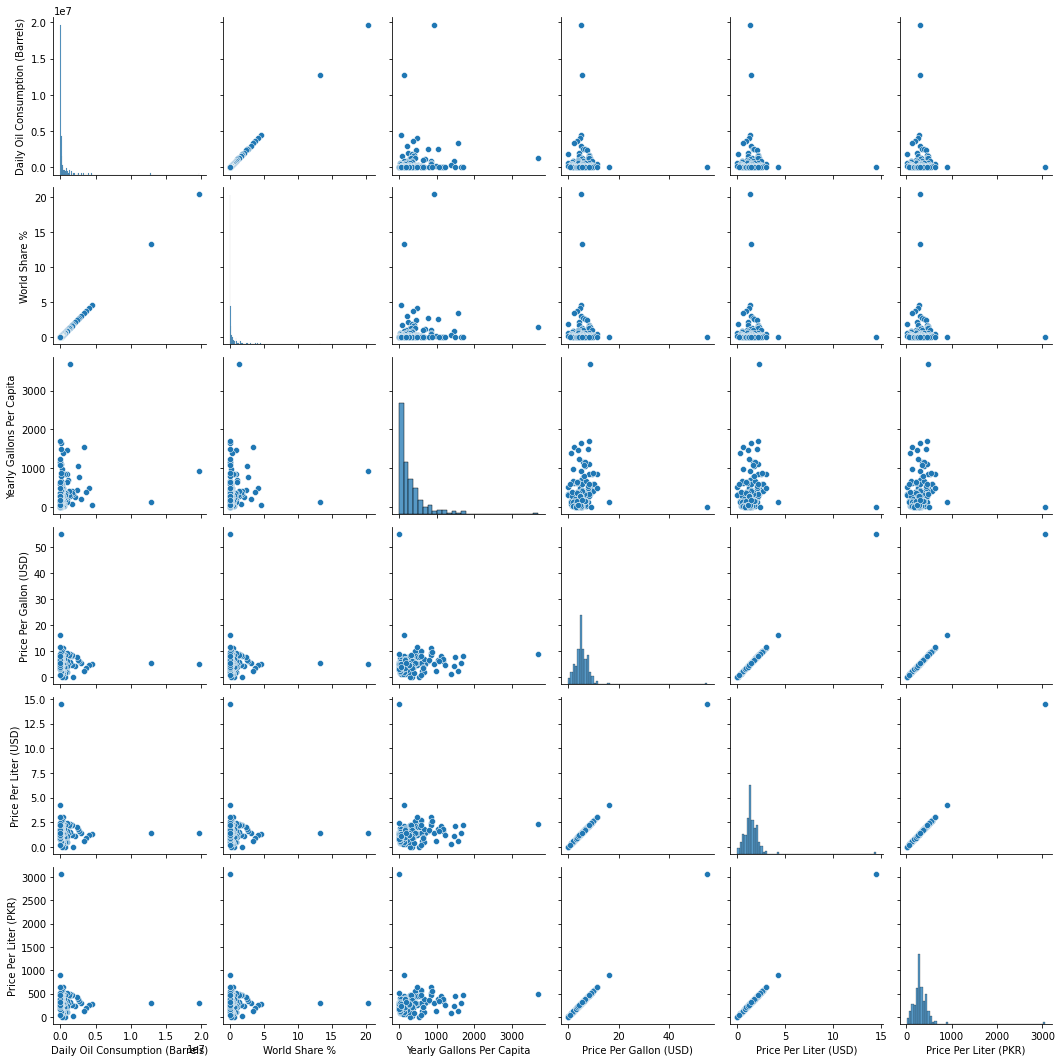

In [ ]:
sns.pairplot(df)

# 6.Predictive Model

Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['Country', 'Daily Oil Consumption (Barrels)', 'World Share %',
       'Yearly Gallons Per Capita', 'Price Per Gallon (USD)',
       'Price Per Liter (USD)', 'Price Per Liter (PKR)'],
      dtype='object')

In [ ]:
X=df[['Daily Oil Consumption (Barrels)', 'World Share %','Yearly Gallons Per Capita']]

In [ ]:
y=df['Price Per Liter (USD)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
prediction=lm.predict(X_test)

In [ ]:
prediction

array([1.58220459, 1.57266744, 1.5655135 , 1.58683872, 1.57437611,
       1.55860294, 1.58565174, 1.57071522, 1.5609909 , 1.56893812,
       1.57887591, 1.57071642, 1.56420916, 1.57130424, 1.57041781,
       1.58959164, 1.52804316, 1.57048563, 1.59255329, 1.55647386,
       1.5766591 , 1.57669893, 1.58027034, 1.57761475, 1.56067498,
       1.57500385, 1.56842377, 1.53708368, 1.56981383, 1.57402647,
       1.56936327, 1.56862712, 1.56912157, 1.58395174, 1.5918918 ,
       1.56449972, 1.46449096, 1.65683291, 1.15701823, 1.58387052,
       1.5726062 , 1.5923424 , 1.56909252, 1.57876898, 1.55638506,
       1.57163921, 1.61328958, 1.60768089, 1.56977286, 1.57009144,
       1.57159357, 1.57345553, 1.57507097, 1.57001883, 1.56714264])

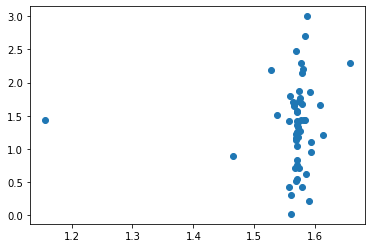

In [ ]:
plt.scatter(prediction,y_test)

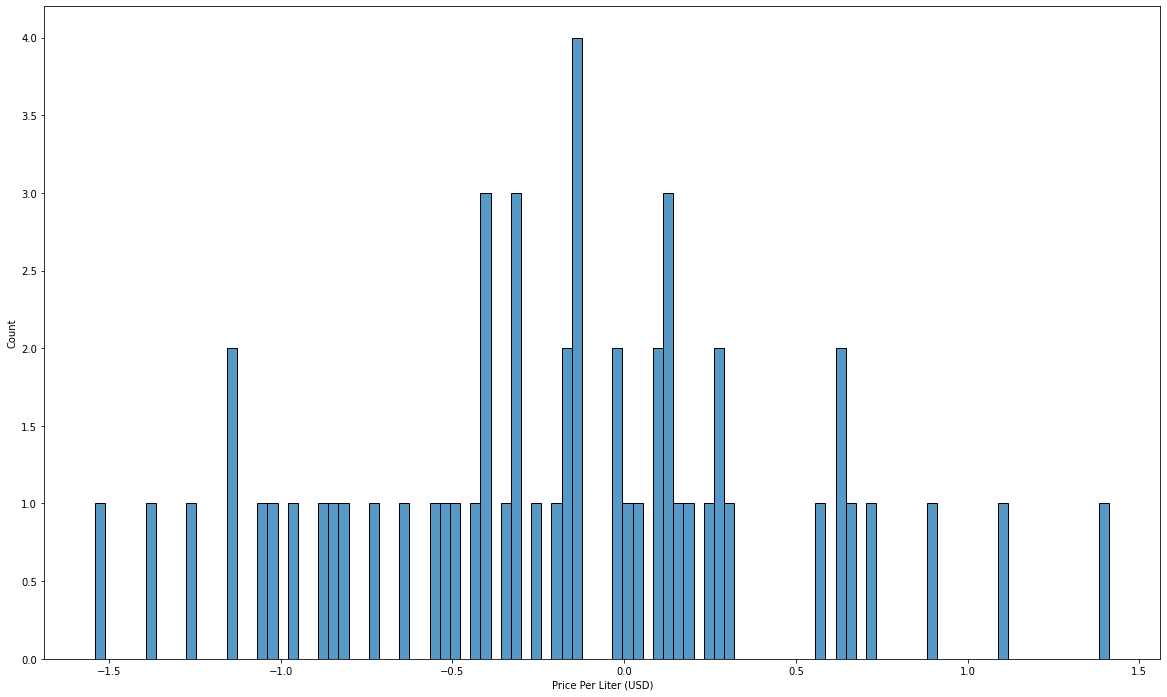

In [ ]:
plt.figure(figsize=(20,12))
sns.histplot(y_test-prediction,bins=100)

In [ ]:
accu_sc=round(lm.score(X_train,y_train)*100,2)

In [ ]:
print('Confidenace score is:' , accu_sc)

Confidenace score is: 0.21


In [ ]:
from sklearn import metrics

In [ ]:
print('Mean Absoulte Error :',metrics.mean_absolute_error(prediction,y_test))

Mean Absoulte Error : 0.5088108687101557


In [ ]:
print('Mean Squared Error :',metrics.mean_squared_error(prediction,y_test))

Mean Squared Error : 0.423975914704211


In [ ]:
print('Root Mean Square Error :',np.sqrt(metrics.mean_squared_error(prediction,y_test)))

Root Mean Square Error : 0.6511343292318498


# 7.Data Visualization

In [ ]:
#plt.figure(figsize=(18,12))
#sns.boxplot(df['Price Per Liter (USD)'])

fig=px.box(df['Price Per Liter (USD)'],height=600,width=800,template='simple_white')
fig.update_layout(title={'text':'Box plot of Price Per Liter (USD) of petrol world wide'},title_x=0.5)
fig.show()

In [ ]:
fig=px.histogram(df,x='Price Per Liter (USD)',nbins=100,template='simple_white',height=500,width=800)
fig.update_layout(title={'text':'Histogram of Price Per Liter (USD) of petrol world wide'},title_x=0.5)
fig.show()

In [ ]:
top_10_countries = df.nlargest(10, 'Daily Oil Consumption (Barrels)')
top_10_countries.head(10)

,Country,Daily Oil Consumption (Barrels),World Share %,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
0,United States,19687287,20.385127,934.3,5.19,1.37,289.97
1,China,12791553,13.244965,138.7,5.42,1.43,302.87
2,India,4443000,4.600487,51.4,5.05,1.33,281.93
3,Japan,4012877,4.155118,481.5,4.69,1.24,262.05
4,Russia,3631287,3.760002,383.2,3.41,0.90,190.56
5,Saudi Arabia,3302000,3.419043,1560.2,2.35,0.62,131.34
6,Brazil,2984000,3.089771,221.9,5.36,1.42,299.27
7,South Korea,2605440,2.697793,783.4,6.09,1.61,340.52
8,Canada,2486301,2.574431,1047.6,6.76,1.79,377.74
9,Germany,2383393,2.467875,444.5,7.65,2.02,427.44


In [ ]:
fig=px.bar(top_10_countries, x='Daily Oil Consumption (Barrels)',y='Country',height=300,width=800,template='simple_white')
fig.update_layout(title={'text':'Daily Oil Consumption (Barrels) - Top 10 Countries'},title_x=0.5)
fig.show()

In [ ]:
top_10_countries = df.nlargest(10, 'World Share %')
fig=px.bar(top_10_countries, x='World Share %',y='Country',height=300,width=800,template='simple_white')
fig.update_layout(title={'text':'World Share % of petrol - Top 10 Countries'},title_x=0.5)
fig.show()

In [ ]:
top_10_countries = df.nlargest(10, 'Yearly Gallons Per Capita')
fig=px.bar(top_10_countries, x='Yearly Gallons Per Capita',y='Country',height=300,width=800,template='simple_white')
fig.update_layout(title={'text':'Yearly Gallons Per Capita - Top 10 Countries'},title_x=0.5)
fig.show()

In [ ]:
top_10_countries = df.nlargest(10, 'Price Per Liter (USD)')
fig=px.bar(top_10_countries, x='Price Per Liter (USD)',y='Country',height=300,width=800,template='simple_white')
fig.update_layout(title={'text':'Bar plot of Price Per Liter (USD) of petrol'},title_x=0.5)
fig.show()

In [ ]:
df_Pak=df[df['Country']=='Pakistan']
df_Ind=df[df['Country']=='India']
df_Ban=df[df['Country']=='Bangladesh']


In [ ]:
df_Com=pd.concat([df_Pak,df_Ind,df_Ban])

In [ ]:
fig=px.bar(df_Com, x='Daily Oil Consumption (Barrels)',y='Country',color='Country',color_discrete_sequence=['lightgreen','lightblue','pink'],height=300,width=800,template='simple_white')
fig.update_layout(title={'text':'Daily Oil Consumption (Barrels)'},title_x=0.5)
fig.show()

In [ ]:
fig=px.bar(df_Com, x='World Share %',y='Country',color='Country',color_discrete_sequence=['lightgreen','lightblue','pink'], height=300,width=800,template='simple_white')

fig.update_layout(title={'text':'World Share % of petrol'},title_x=0.5)
fig.show()

In [ ]:
fig=px.bar(df_Com, x='Yearly Gallons Per Capita',y='Country',color='Country',color_discrete_sequence=['lightgreen','lightblue','pink'],height=300,width=800,template='simple_white')

fig.update_layout(title={'text':'Yearly Gallons Per Capita'},title_x=0.5)
fig.show()

In [ ]:
fig=px.bar(df_Com, x='Price Per Liter (USD)',y='Country',color='Country',color_discrete_sequence=['lightgreen','lightblue','pink'],height=300,width=800,template='simple_white')

fig.update_layout(title={'text':'Bar plot of Price Per Liter (USD) of petrol'},title_x=0.5)
fig.show()

Comparison of Gulf Cooperation Council (GCC) countries 

In [ ]:
df_United_Arab_Emirates=df[df['Country']=='United Arab Emirates']
df_Bahrain=df[df['Country']=='Bahrain']
df_Saudi_Arabia=df[df['Country']=='Saudi Arabia']
df_Oman=df[df['Country']=='Oman']
df_Qatar=df[df['Country']=='Qatar']
df_Kuwait=df[df['Country']=='Kuwait']
df_GCC=pd.concat([df_Bahrain,df_Kuwait,df_Qatar,df_Oman,df_Saudi_Arabia,df_United_Arab_Emirates])

In [ ]:
fig=px.bar(df_GCC, x='Daily Oil Consumption (Barrels)',y='Country',color='Country',height=300,width=800,template='simple_white',color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(title={'text':'Daily Oil Consumption (Barrels) - GCC Countries'},title_x=0.5)
fig.show()

In [ ]:
fig=px.bar(df_GCC, x='World Share %',y='Country',color='Country', height=300,width=800,template='simple_white',color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(title={'text':'World Share % of petrol - GCC Countries'},title_x=0.5)
fig.show()

In [ ]:
fig=px.bar(df_GCC, x='Yearly Gallons Per Capita',y='Country',color='Country',height=300,width=800,template='simple_white',color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(title={'text':'Yearly Gallons Per Capita - GCC Countries'},title_x=0.5)
fig.show()

In [ ]:
fig=px.bar(df_GCC, x='Price Per Liter (USD)',y='Country',color='Country',height=300,width=800,template='simple_white',color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(title={'text':'Bar plot of Price Per Liter (USD) of petrol - GCC Countries'},title_x=0.5)
fig.show()

In [ ]:
print('Thanks')

Thanks
